── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
[7] "#91D1C2FF" "#DC0000FF" "#7E6148FF"

Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




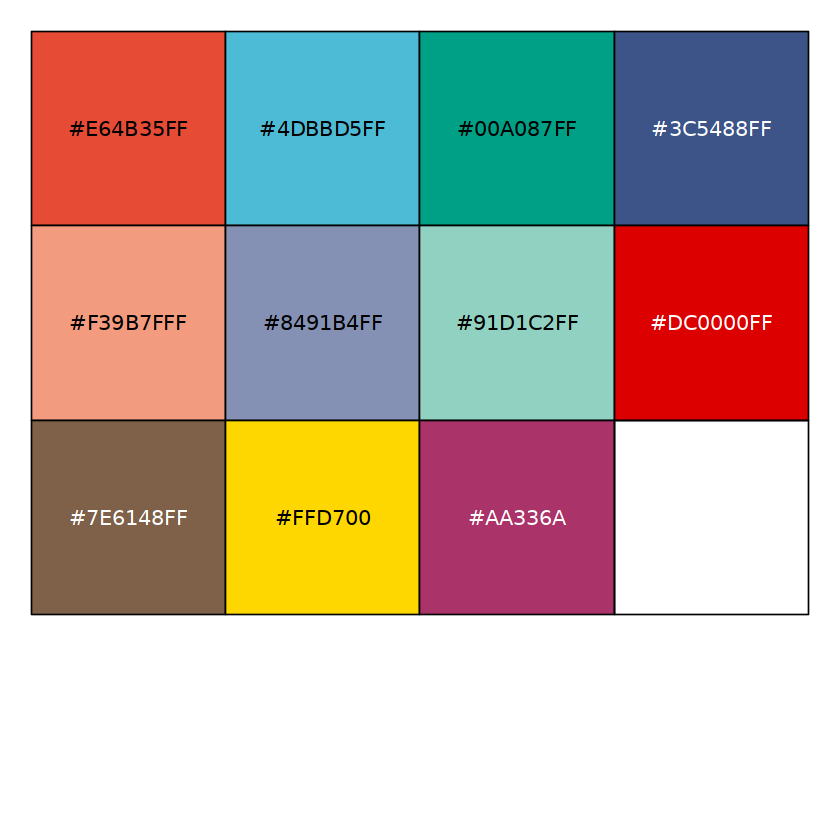

In [1]:
library(tidyverse)

options(scipen=999)

library(cowplot)

library(patchwork)
library(ggsci)

pal_npg("nrc")(9)

color_pal = readRDS("../results/methods_color_pal.rds")
shape_pal = c(15, 17, 3)
names(shape_pal) = c('O2O', 'HE', 'SH')

library(viridis)
library(scales)

show_col(color_pal)

library(ggpubr)
library(scales)

text_sizes <- theme(axis.text.x=element_text(size=9,colour="black"),
                      axis.text.y=element_text(size=9,colour="black"),
                      axis.title.y=element_text(size=9,colour="black", face='bold', margin = margin(t = 2, l = 2, r = 2, b =2, unit = "pt")),
                      axis.title.x=element_text(size=9,colour="black", face='bold', margin = margin(t = 2, l = 2, r = 2, b = 2, unit = "pt")),
                      legend.text = element_text(size=9,colour="black"),
                      legend.title = element_text(size=9,colour="black", margin = margin(t = 5, l = 0, r = 0, b = 5, unit = "pt")),
                      legend.key = element_rect(colour="transparent", fill = "transparent"),
                      strip.text.x = element_text(size=10,color = 'black',face="bold", angle=0),
                      strip.text.y = element_text(size=10,color = 'black', face="bold", angle=0, vjust=0.5, hjust=0),
                      axis.ticks= element_line(color = 'black', size=0.2),
                      axis.line = element_line(colour = "black", size = 0.2, linetype = "solid"),
                      plot.margin=unit(c(2,2,2,2),"pt"),
                      plot.title=element_text(size=12, face="bold", colour="black"))

common_minimal <- text_sizes + theme(
        plot.background = element_rect(fill = NA,colour = NA),
        strip.background = element_rect(fill = NA,colour = NA),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank()) + theme(
    legend.spacing = unit(0.15, 'cm'), 
    legend.key.size = unit(0.2, "cm"))  +
    theme(legend.spacing.y = unit(10, 'pt'),
    legend.text = element_text(margin = margin(t = 7)))


# commonly used, x axis text 45 degree
common_0x <- common_minimal + theme(axis.text.x = element_text(angle=0))
common_45x <- common_minimal + theme(axis.text.x = element_text(angle=45, hjust=1))

### ALCS in reference tasks

In [2]:
sccaf_results_all = read_csv("../results/sccaf_results_all.csv")

Rows: 1833 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): from_species, type_label, integration_method, input_file, homology_...
dbl (3): test_acc, acc_prior, acc_loss

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
order_sccaf_loss = sccaf_results_all %>% group_by(task_name, input_file) %>% 
mutate(species_avg_loss = mean(acc_loss)) %>% 
select(type, task_name, species_avg_loss) %>% ungroup() %>% ungroup() %>% 
group_by(type) %>% mutate(type_avg_loss = mean(species_avg_loss)) %>% 
arrange(desc(type_avg_loss)) %>% 
pull(type) %>% unique()

Adding missing grouping variables: `input_file`


In [4]:
order_sccaf_loss 

[1] "LIGER one2one only"              "LIGER higher expression"        
 [3] "LIGER stronger homology"         "LIGER UINMF stronger homology"  
 [5] "LIGER UINMF one2one only"        "LIGER UINMF higher expression"  
 [7] "fastMNN one2one only"            "fastMNN stronger homology"      
 [9] "fastMNN higher expression"       "Scanorama one2one only"         
[11] "Harmony one2one only"            "Scanorama higher expression"    
[13] "SeuratV4 CCA one2one only"       "Scanorama stronger homology"    
[15] "Harmony stronger homology"       "Harmony higher expression"      
[17] "SeuratV4 CCA stronger homology"  "SeuratV4 CCA higher expression" 
[19] "SeuratV4 RPCA one2one only"      "SeuratV4 RPCA stronger homology"
[21] "SeuratV4 RPCA higher expression" "scVI one2one only"              
[23] "scVI stronger homology"          "scVI higher expression"         
[25] "scANVI one2one only"             "unintegrated one2one only"      
[27] "scANVI stronger homology"        "scANVI higher expression"       
[29] "unintegrated stronger homology"  "unintegrated higher expression"

In [5]:
levels(factor(sccaf_results_all$task_name))

[1] "Embryo_dr_xt"         "Heart_hs_dr"          "Heart_hs_mf"         
 [4] "Heart_hs_mf_mm"       "Heart_hs_mf_mm_xl"    "Heart_hs_mf_mm_xl_dr"
 [7] "Heart_hs_mm"          "Heart_hs_xl"          "Heart_mf_dr"         
[10] "Heart_mf_mm"          "Heart_mf_xl"          "Heart_mm_dr"         
[13] "Heart_mm_xl"          "Heart_xl_dr"          "Hippocampus"         
[16] "Pancreas"

In [6]:
tasks_use = c("Heart_hs_mf",
               "Pancreas",'Heart_hs_mf_mm', "Hippocampus", 
              'Heart_hs_mf_mm_xl', 'Heart_hs_mf_mm_xl_dr', "Embryo_dr_xt")

In [7]:
options(repr.plot.height = 8, repr.plot.width = 8)

In [8]:
sccaf_fig = sccaf_results_all %>% filter(task_name %in% tasks_use)%>%  group_by(task_name, input_file) %>% 
mutate(species_avg_loss = mean(acc_loss)) %>% 
select(type, task_name, species_avg_loss, integration_method) %>% ungroup() %>% ungroup() %>% 
group_by(type) %>% mutate(type_avg_loss = mean(species_avg_loss)) %>% 
select(type, species_avg_loss, integration_method, task_name) %>% 
unique() %>% 
ggplot(aes(y = factor(type, levels = order_sccaf_loss), x = species_avg_loss, fill = integration_method)) + 
geom_bar(stat = 'identity') + facet_wrap(.~factor(task_name, levels = tasks_use),  ncol=1) + 
common_0x +
coord_flip() +
scale_y_discrete() +
theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
scale_fill_manual(name = 'Integration method', values = color_pal) +
labs(y = 'Integration strategy', x = 'ALCS') + 
guides(fill = guide_legend(nrow = 1, override.aes=list(shape = 2))) +
theme(legend.position = 'bottom')

Adding missing grouping variables: `input_file`


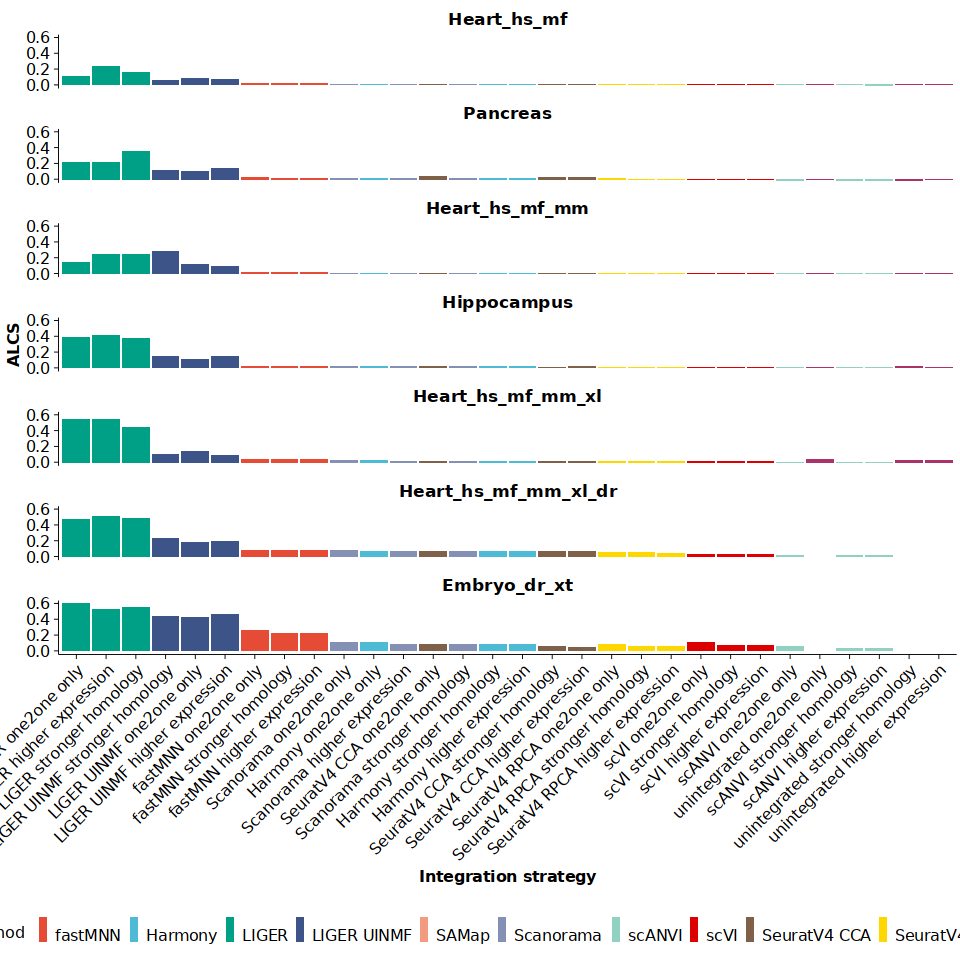

In [9]:
sccaf_fig

### pair-wise ALCS for heart tasks

In [11]:
sccaf_pairwise = sccaf_results_all %>% filter(!(task_name %in% tasks_use[2:7]))%>%  group_by(task_name, input_file) %>% 
mutate(species_avg_loss = mean(acc_loss)) %>% 
select(type, task_name, species_avg_loss, integration_method, homology_method) %>% ungroup() %>% ungroup() %>% 
group_by(type) %>% mutate(type_avg_loss = mean(species_avg_loss)) %>% 
select(type, species_avg_loss, integration_method, homology_method, task_name) %>% 
unique() %>% 
mutate(species_1 = gsub("Heart_", "", task_name)) %>% 
separate(species_1, "_", into = c("Species1", "Species2"))

Adding missing grouping variables: `input_file`


In [12]:
head(sccaf_pairwise)

type,species_avg_loss,integration_method,homology_method,task_name,Species1,Species2
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
LIGER higher expression,0.22831029,LIGER,higher expression,Heart_hs_mf,hs,mf
LIGER stronger homology,0.16121511,LIGER,stronger homology,Heart_hs_mf,hs,mf
LIGER UINMF one2one only,0.07834362,LIGER UINMF,one2one only,Heart_hs_mf,hs,mf
LIGER UINMF higher expression,0.07302196,LIGER UINMF,higher expression,Heart_hs_mf,hs,mf
LIGER one2one only,0.10471192,LIGER,one2one only,Heart_hs_mf,hs,mf
LIGER UINMF stronger homology,0.06142213,LIGER UINMF,stronger homology,Heart_hs_mf,hs,mf


In [13]:
all_pairs = c('Heart_hs_mf','Heart_hs_mm','Heart_hs_xl','Heart_hs_dr', 
              'Heart_mf_mm','Heart_mf_xl', 'Heart_mf_dr', 
              'Heart_mm_xl','Heart_mm_dr', 'Heart_xl_dr')

In [14]:
species_order = c("hs", "mf", "mm", "xl", "dr")

In [15]:
sccaf_pairwise_2 <- sccaf_pairwise

In [17]:
color_pal[c(1, 2, 3, 4, 6, 7, 8, 9, 10)]

fastMNN       Harmony         LIGER   LIGER UINMF     Scanorama 
  "#E64B35FF"   "#4DBBD5FF"   "#00A087FF"   "#3C5488FF"   "#8491B4FF" 
       scANVI          scVI  SeuratV4 CCA SeuratV4 RPCA 
  "#91D1C2FF"   "#DC0000FF"   "#7E6148FF"     "#FFD700"

In [18]:
alcs_bar = rbind(sccaf_pairwise, sccaf_pairwise_2) %>% 
group_by(task_name, integration_method) %>% 
mutate(avg_loss_mean = mean(species_avg_loss)) %>% 
mutate(avg_loss_sd = sd(species_avg_loss)) %>% 
ungroup() %>% 
arrange(desc(avg_loss_mean)) %>% 
mutate(avg_loss_mean = ifelse(avg_loss_mean > 0, avg_loss_mean, 0)) %>% 
select(avg_loss_mean, avg_loss_sd, integration_method, task_name, Species1, Species2) %>% 
unique() %>% 
ggplot(aes(x = fct_inorder(integration_method), y = avg_loss_mean, fill = integration_method)) + 
geom_bar(stat = 'identity') + 
geom_errorbar(aes(ymin = avg_loss_mean - avg_loss_sd, ymax = avg_loss_mean + avg_loss_sd), size = 0.2) +
facet_grid(factor(Species1, levels = (species_order))~factor(Species2, levels = rev(species_order))) + 
common_0x +
scale_x_discrete() +
theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
scale_fill_manual(name = 'Integration method', values = color_pal[c(1, 2, 3, 4, 6, 7, 8, 9, 10)]) +
labs(y = 'Integration strategy', x = 'ALCS') +
theme(axis.text.x = element_blank(),
     axis.ticks.x = element_blank()) +
scale_y_continuous(breaks = c(0, 0.2, 0.4, 0.6, 0.8, 1.0), limits = c(0, 0.9)) 



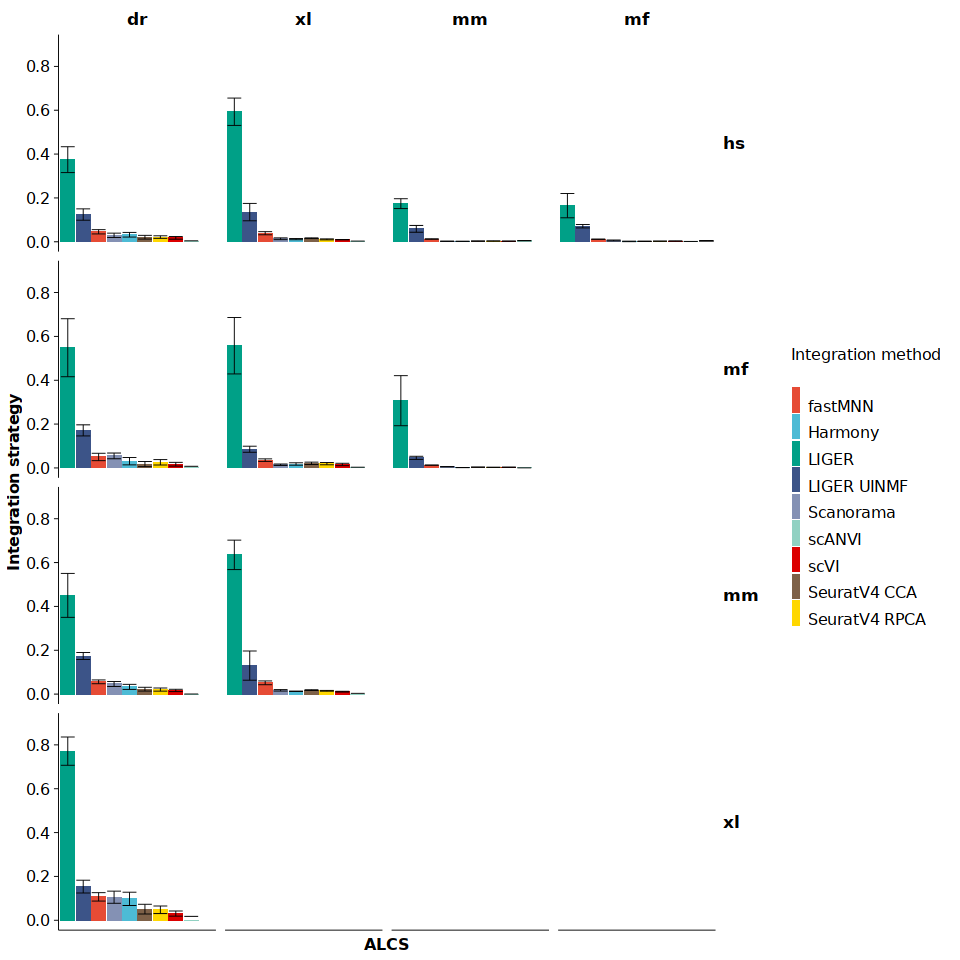

In [19]:
alcs_bar

### ALCS per species in SeuratCCA and other strategies for heart tasks

In [20]:
species_order = c("hsapiens", "mfascicularis", "mmusculus", "xtropicalis", "drerio")

In [28]:
options(repr.plot.width = 5, repr.plot.height = 4)

In [29]:
gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}

color_pal_species = gg_color_hue(5)

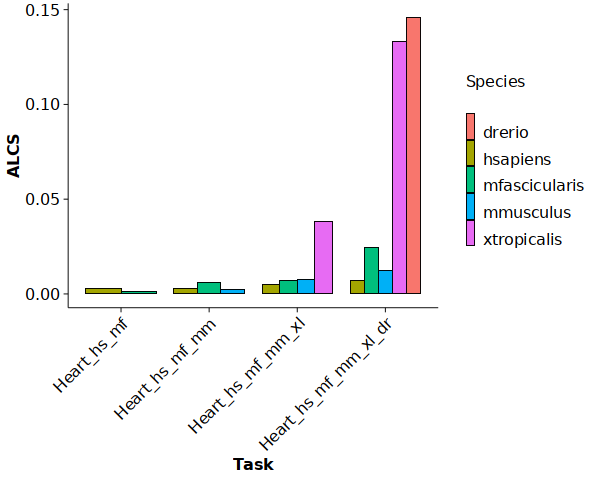

In [30]:
sccaf_results_all %>% filter(integration_method == 'SeuratV4 CCA') %>% 
filter(homology_method == 'one2one only') %>% 
filter(task_name %in% c("Heart_hs_mf", "Heart_hs_mf_mm", "Heart_hs_mf_mm_xl", "Heart_hs_mf_mm_xl_dr")) %>% 
group_by(from_species, task_name) %>% 
mutate(mean_acc_loss = mean(acc_loss)) %>% 
select(task_name, from_species, mean_acc_loss) %>% unique()%>% 
ggplot(aes(x = task_name, y = mean_acc_loss, group = factor(from_species, levels = species_order), fill = from_species)) + 
geom_bar(stat = 'identity', position = 'dodge', color = 'black',  width = 0.8, size = 0.2) + common_45x +
scale_fill_manual(name = 'Species', values = color_pal_species) +
labs(y = 'ALCS', x = 'Task')

In [32]:
options(repr.plot.width = 8, repr.plot.height = 12)

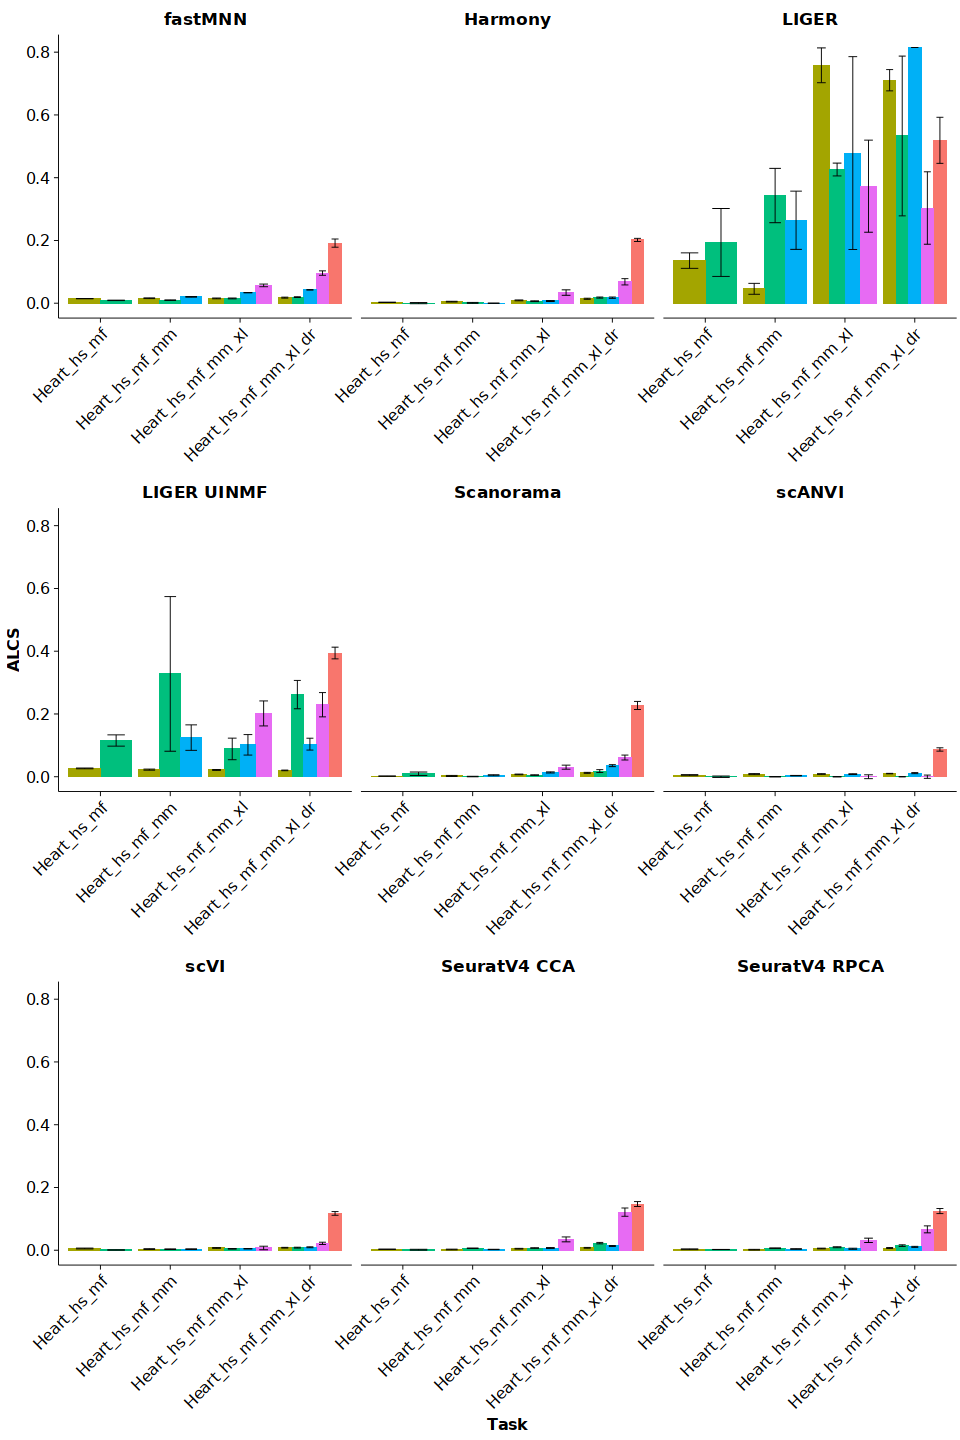

In [33]:
sccaf_results_all %>% filter(integration_method != 'unintegrated') %>% 
filter(task_name %in% c("Heart_hs_mf", "Heart_hs_mf_mm", "Heart_hs_mf_mm_xl", "Heart_hs_mf_mm_xl_dr")) %>% 
group_by(from_species, task_name, integration_method) %>% 
mutate(mean_acc_loss = mean(acc_loss)) %>% 
mutate(sd_acc_loss = sd(acc_loss)) %>% 
mutate(mean_acc_loss = ifelse(mean_acc_loss > 0, mean_acc_loss, 0)) %>% 
select(task_name, from_species, mean_acc_loss, integration_method, sd_acc_loss) %>% unique() %>% 
ggplot(aes(x = task_name, y = mean_acc_loss, group = factor(from_species, levels = species_order), fill = from_species)) +
geom_bar(stat = 'identity', position = position_dodge(width=0.9)) +
geom_errorbar(aes(ymin = mean_acc_loss - sd_acc_loss, ymax = mean_acc_loss + sd_acc_loss, 
                  group = factor(from_species, levels = species_order)), size = 0.2, width = 0.5, 
              position=position_dodge(width=0.9)) +
facet_wrap(.~integration_method, scales = 'free_x') + 
scale_fill_manual(name = 'Species', values = color_pal_species) +
labs(y = 'ALCS', x = 'Task') + theme(legend.position = 'none') +
common_45x

